Simulating medical image data for Brain Tumor Detection (Binary Classification)...
Data shape: (128, 128, 1)

Building CNN model for Binary Classification...
Training the model (using mock medical data)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training complete.

Evaluating model performance...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step

--- Classification Report (Precision, Recall, F1 Score) ---
              precision    recall  f1-score   support

No Tumor (0)       0.40      1.00      0.57         8
   Tumor (1)       0.00      0.00      0.00        12

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20

Overall F1 Score: 0.0000

--- ROC Curve and AUC ---


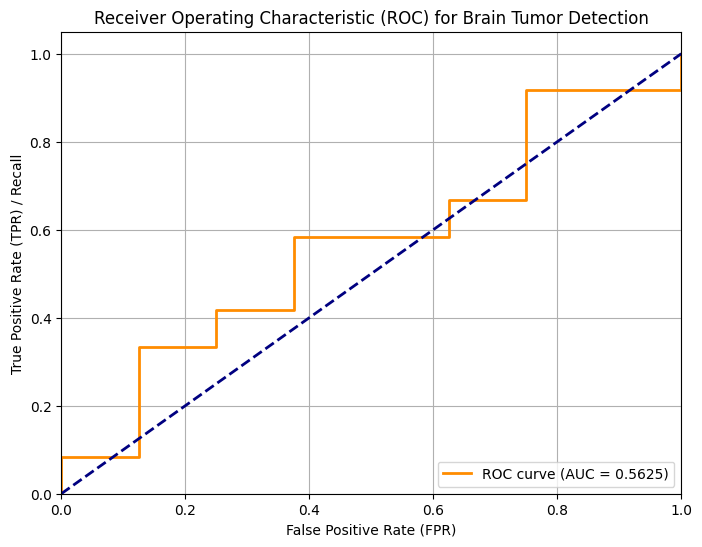


Area Under the Curve (AUC): 0.5625


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, roc_curve, auc, f1_score
import matplotlib.pyplot as plt

# --- 1. Data Simulation (Mock Medical Images) ---
# Simulate 100 images (50 Tumor=1, 50 No Tumor=0)
def load_mock_medical_data(num_samples=100, img_size=(128, 128, 1)):
    print("Simulating medical image data for Brain Tumor Detection (Binary Classification)...")
    # Simulate grayscale MRI scans (1 channel)
    X = np.random.rand(num_samples, *img_size).astype('float32') * 255
    # Simulate labels: 0 for No Tumor, 1 for Tumor
    Y = np.array([0] * (num_samples // 2) + [1] * (num_samples // 2))
    np.random.shuffle(Y)

    # Preprocessing
    X /= 255.0  # Normalize
    X_train, X_test = X[:80], X[80:]
    Y_train, Y_test = Y[:80], Y[80:]
    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = load_mock_medical_data()
IMG_SHAPE = X_train.shape[1:]
print(f"Data shape: {IMG_SHAPE}")

# --- 2. Build the CNN Model (Binary Classification) ---
print("\nBuilding CNN model for Binary Classification...")
#
model = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=IMG_SHAPE, padding='valid'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Use Sigmoid for binary output
])

# --- 3. Compile and Train ---
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Use Binary Crossentropy
              metrics=['accuracy'])

# Train with simulated data
print("Training the model (using mock medical data)...")
history = model.fit(X_train, Y_train, epochs=10, batch_size=16, verbose=0, validation_split=0.2)
print("Training complete.")

# --- 4. Prediction and Evaluation Metrics ---
print("\nEvaluating model performance...")
# Get probabilities for ROC/AUC
Y_pred_probs = model.predict(X_test).flatten()
# Convert probabilities to hard predictions (0 or 1)
Y_pred_labels = (Y_pred_probs > 0.5).astype(int)

# A. Classification Report (Precision, Recall, F1 Score)
print("\n--- Classification Report (Precision, Recall, F1 Score) ---")
target_names = ['No Tumor (0)', 'Tumor (1)']
print(classification_report(Y_test, Y_pred_labels, target_names=target_names, zero_division=0))

# B. F1 Score (Specific for binary tasks)
f1 = f1_score(Y_test, Y_pred_labels, zero_division=0)
print(f"Overall F1 Score: {f1:.4f}")

# C. ROC Curve and AUC Calculation
#
print("\n--- ROC Curve and AUC ---")
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Receiver Operating Characteristic (ROC) for Brain Tumor Detection')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nArea Under the Curve (AUC): {roc_auc:.4f}")